In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [2]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [3]:
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 교차 검증의 개별 negative MSE scores : ", np.round(neg_mse_scores, 2))
print("5 교차 검증의 개별 RMSE scores : ", np.round(rmse_scores, 2))
print("5 교차 검증의 평균 RMSE : {:.3f}".format(avg_rmse))

5 교차 검증의 개별 negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [4]:
# 입력 모델과 데이터 세트를 입력받아 교차 검증으로 평균 RMSE 계산
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("=====", model.__class__.__name__, "=====")
    print("5 교차 검증의 평균 RMSE : {:.3f}".format(avg_rmse))

In [5]:
get_model_cv_prediction(rf, X_data, y_target)

===== RandomForestRegressor =====
5 교차 검증의 평균 RMSE : 4.423


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(max_depth=4, random_state=0)
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=0)
gb_reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 반복 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

===== DecisionTreeRegressor =====
5 교차 검증의 평균 RMSE : 5.978
===== RandomForestRegressor =====
5 교차 검증의 평균 RMSE : 4.423
===== GradientBoostingRegressor =====
5 교차 검증의 평균 RMSE : 4.269
[16:07:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
===== XGBRegressor =====
5 교차 검증의 평균 RMSE : 4.089
===== LGBMRegressor =====
5 교차 검증의 평균 RMSE : 4.646


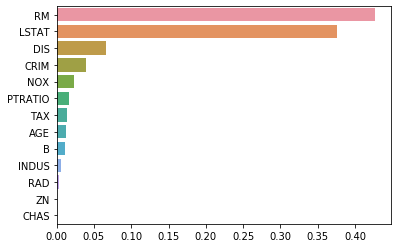

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


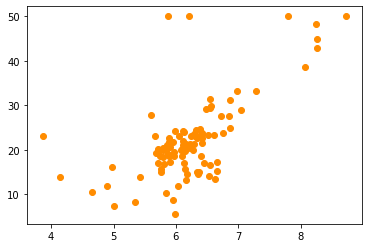

In [10]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
# 데이터 100개 추출
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

In [13]:
# 테스트용 데이터 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)
X_test
X_test.shape

(100, 1)

In [15]:
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

In [16]:
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

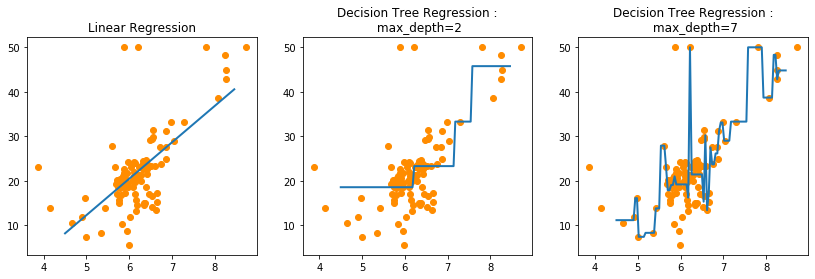

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# 시각화
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)
ax2.set_title('Decision Tree Regression :\n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_dt2, label='max_depth=2', linewidth=2)
ax3.set_title('Decision Tree Regression :\n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_dt7, label='max_depth=7', linewidth=2)